We will make our first attempt at machine learning or artificial intelligence model creation <br>
by using a **feature selection algorithm** usually called **forward selection**.
- **Forward selection of variables (features)** means that **on the first pass of the forward selection algorithm** we test all variables or features individually and put **the most significant variable** into our model.
- **On the second pass of the algorithm** we test all other variables against the most significant variable and once again select **the second most significant variable** for use in our model together with the most significant variable.
- On the third pass we test the remaining variables against our two selected variables and continue the process until none of the remaining variables contribute significantly to our prediction or we run out of variables (features).

Forward selection can be done in very many ways.<br>
This particular way of using inferential probability values related to scientific hypothesis testing has some scientific appeal <br>
and will reduce the effects of chance in smaller datasets.<br>
Another popular way to use forward selection is through the *R2 adjusted* statistic as a measure of accuracy <br>
with the model considered complete when new variables don't contribute to accuracy anymore.<br>
Or considering a threshold for example to stop further additions of variables <br>
when their contribution to accuracy is lower than for example 1%, 5% or 10%. <br>
In our way of forward selection with probability values we use a 5% probability value threshold for including variables.

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

In [2]:
diabetes = datasets.load_diabetes()
DiaB = pd.DataFrame(data = diabetes.data, columns=diabetes.feature_names)
DiaB["Target"] = diabetes.target
DiaB2 = DiaB.copy(deep=True)
DiaB.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Create a Regression model

Using ML Forward Selection

In [3]:
# Start with all column names except the target variable
vars = set(DiaB.columns)
vars.remove("Target")  # 'Target' is the dependent variable
modelVars = []  # List to store selected independent variables
bestPval = 0  # Initialize best p-value
pValThresh = 0.05  # Threshold for statistical significance

# Continue looping while there are variables left and the best p-value is below the threshold
while (len(vars) > 0) and (bestPval < pValThresh):
    testModels = []  # Temporary list to store (p-value, variable) pairs for this iteration
    for var in vars:
        # Build a regression formula with current modelVars + the new candidate variable
        regrModel = f"Target ~ {'+'.join(modelVars + [var])}"
        print(regrModel)  # Optional: print the formula being tested

        # Create and fit the regression model
        testModel = smf.ols(regrModel, DiaB)
        testModelFit = testModel.fit()

        
        # Get the p-value of the candidate variable (assumed to be the last one added)
        # SAFER alternative: testmodelFit.pvalues[var]
        pvalTestModel = testModelFit.pvalues[-1]

        # Store the p-value and variable name for comparison
        testModels.append((pvalTestModel, var))

    # Sort the list of test models by p-value (lowest first)
    testModels.sort()

    # Select the variable with the lowest p-value
    bestPval, selectedVar = testModels.pop(0)

    # If it's statistically significant, add it to the model
    if bestPval < pValThresh:
        modelVars.append(selectedVar)  # Add to selected variables
        vars.remove(selectedVar)  # Remove from candidates

Target ~ age
Target ~ sex
Target ~ s4
Target ~ s3
Target ~ s1
Target ~ bmi
Target ~ s5
Target ~ bp
Target ~ s6
Target ~ s2
Target ~ bmi+age
Target ~ bmi+sex
Target ~ bmi+s4
Target ~ bmi+s3
Target ~ bmi+s1
Target ~ bmi+s5
Target ~ bmi+bp
Target ~ bmi+s6
Target ~ bmi+s2
Target ~ bmi+s5+age
Target ~ bmi+s5+sex
Target ~ bmi+s5+s4
Target ~ bmi+s5+s3
Target ~ bmi+s5+s1
Target ~ bmi+s5+bp
Target ~ bmi+s5+s6
Target ~ bmi+s5+s2
Target ~ bmi+s5+bp+age
Target ~ bmi+s5+bp+sex
Target ~ bmi+s5+bp+s4
Target ~ bmi+s5+bp+s3
Target ~ bmi+s5+bp+s1
Target ~ bmi+s5+bp+s6
Target ~ bmi+s5+bp+s2
Target ~ bmi+s5+bp+s1+age
Target ~ bmi+s5+bp+s1+sex
Target ~ bmi+s5+bp+s1+s4
Target ~ bmi+s5+bp+s1+s3
Target ~ bmi+s5+bp+s1+s6
Target ~ bmi+s5+bp+s1+s2
Target ~ bmi+s5+bp+s1+sex+age
Target ~ bmi+s5+bp+s1+sex+s4
Target ~ bmi+s5+bp+s1+sex+s3
Target ~ bmi+s5+bp+s1+sex+s6
Target ~ bmi+s5+bp+s1+sex+s2
Target ~ bmi+s5+bp+s1+sex+s2+age
Target ~ bmi+s5+bp+s1+sex+s2+s4
Target ~ bmi+s5+bp+s1+sex+s2+s3
Target ~ bmi+s5+bp+s1+sex+

# Create the final model

In [4]:
modelVars

['bmi', 's5', 'bp', 's1', 'sex', 's2']

In [7]:
regrModel = f"Target ~ {'+'.join(modelVars)}"
model = smf.ols(regrModel, DiaB).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           3.01e-65
Time:                        08:30:07   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.572     59.159      0.0

## Create model predictions and residuals

To compare this model creation process with the manual process

In [9]:
DiaB["yPred"] = model.predict(DiaB)
DiaB["Residual"] = DiaB["Target"] - DiaB["yPred"]
stdRes = DiaB["Residual"].std()
DiaB["Standardized Res"] = DiaB["Residual"]/stdRes
DiaB.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target,yPred,Residual,Standardized Res
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,211.276563,-60.276563,-1.122563
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,67.486483,7.513517,0.139928
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,180.798238,-39.798238,-0.741184
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,166.571751,39.428249,0.734293
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,129.815941,5.184059,0.096546


## Make a selected subset of residual plots

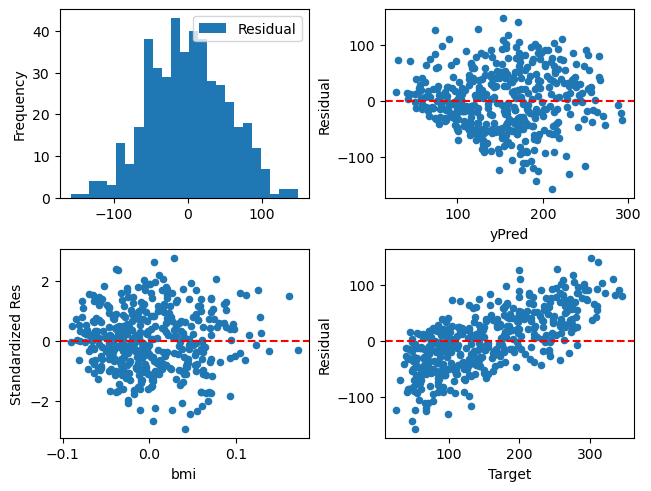

In [20]:
fig, ((hist1, resYp), (sresBmi, resTarg)) = plt.subplots(2, 2, layout="constrained")
DiaB.plot(y="Residual", kind="hist", bins=25, ax=hist1)
DiaB.plot("yPred", "Residual", kind="scatter", ax=resYp)
resYp.axhline(y=0.0, c="red", linestyle="dashed")
DiaB.plot("bmi", "Standardized Res", kind="scatter", ax=sresBmi)
sresBmi.axhline(y=0.0, c="red", linestyle="dashed")
DiaB.plot("Target", "Residual", kind="scatter", ax=resTarg)
resTarg.axhline(y=0.0, c="red", linestyle="dashed")
plt.show()